<a href="https://colab.research.google.com/github/zoraizmohammad/nccf/blob/main/FEATHRnewcustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/drive/MyDrive/Projects/May - Jan New donors - May - Jan New donors (1).csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows to understand the dataset structure
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cons ID                    302 non-null    object 
 1   LO ID                      302 non-null    int64  
 2   Type                       302 non-null    object 
 3   Date                       302 non-null    object 
 4   Amount                     302 non-null    object 
 5   Fund(s)                    302 non-null    object 
 6   Appeal(s)                  302 non-null    object 
 7   Origin Source Code         290 non-null    object 
 8   Origin Subsource Code      290 non-null    object 
 9   NC Oyster Trail applicant  290 non-null    object 
 10  Volunteer Marker           290 non-null    object 
 11  DLL subscriber             290 non-null    float64
 12  GenX subscriber            290 non-null    object 
 13  Lake M subscriber          290 non-null    float64

(None,
       cons ID    LO ID            Type        Date     Amount  \
 0       42801  1125656            Cash   1/30/2025    $750.00   
 1  LO-1013858  1013858    Gift-in-Kind   10/7/2024  $5,000.00   
 2  LO-1008233  1008233            Cash   5/26/2024     $50.00   
 3  LO-1008142  1008142  Recurring Gift    6/3/2024     $50.00   
 4  LO-1007998  1007998            Cash  12/20/2024    $100.00   
 
              Fund(s)             Appeal(s) Origin Source Code  \
 0  Unrestricted Fund           25 NE Roast                  0   
 1  Unrestricted Fund  24 PersSolic/Unsolic                  0   
 2  Unrestricted Fund         24 New Member                  0   
 3  Unrestricted Fund   24 Membership Renew                  0   
 4  Unrestricted Fund  24 PersSolic/Unsolic                  0   
 
   Origin Subsource Code NC Oyster Trail applicant  ... GenX subscriber  \
 0                     0                         0  ...               0   
 1                     0                       

In [ ]:
import numpy as np

# Make a copy for cleaning
df_cleaned = df.copy()

# Clean the 'Amount' column: remove '$' and ',' then convert to float
df_cleaned['Amount'] = df_cleaned['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Fill NaNs in categorical columns with 'Unknown' and in numeric columns with 0
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].fillna('Unknown')
    else:
        df_cleaned[col] = df_cleaned[col].fillna(0)

# Describe numeric columns to see distributions
numeric_summary = df_cleaned.describe()

# Count unique values in some key categorical columns
categorical_overview = {
    "Type": df_cleaned["Type"].value_counts(),
    "Fund(s)": df_cleaned["Fund(s)"].value_counts(),
    "Appeal(s)": df_cleaned["Appeal(s)"].value_counts().head(10),
    "Origin Source Code": df_cleaned["Origin Source Code"].value_counts().head(10),
    "Enews subscriber": df_cleaned["Enews subscriber"].value_counts(),
    "Survey Submitted": df_cleaned["Survey Submitted"].value_counts()
}

numeric_summary, categorical_overview

(              LO ID                           Date       Amount  \
 count  3.020000e+02                            302   302.000000   
 mean   1.060607e+06  2024-09-30 20:54:02.384105984   170.602583   
 min    0.000000e+00            2024-05-05 00:00:00     5.000000   
 25%    1.069951e+06            2024-08-01 00:00:00    35.000000   
 50%    1.118440e+06            2024-09-23 00:00:00    64.500000   
 75%    1.121476e+06            2024-12-08 00:00:00   117.500000   
 max    1.125656e+06            2025-01-30 00:00:00  5000.000000   
 std    1.998001e+05                            NaN   513.936854   
 
        DLL subscriber  Lake M subscriber  Stump Sound subscriber  \
 count           302.0              302.0                   302.0   
 mean              0.0                0.0                     0.0   
 min               0.0                0.0                     0.0   
 25%               0.0                0.0                     0.0   
 50%               0.0                0.0

# Relevant Plots

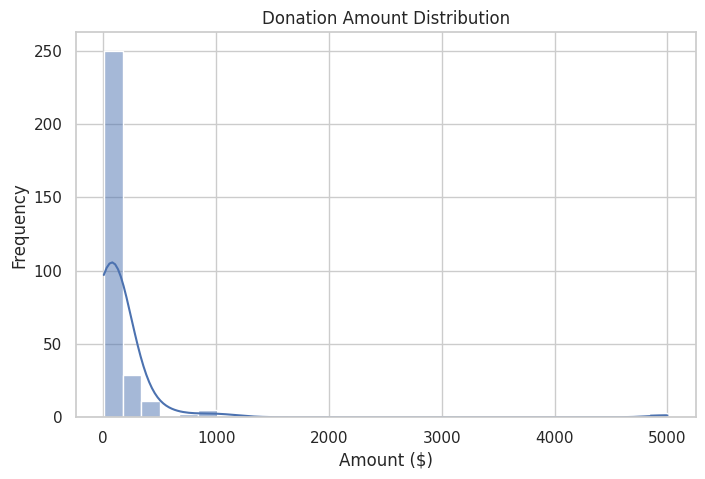

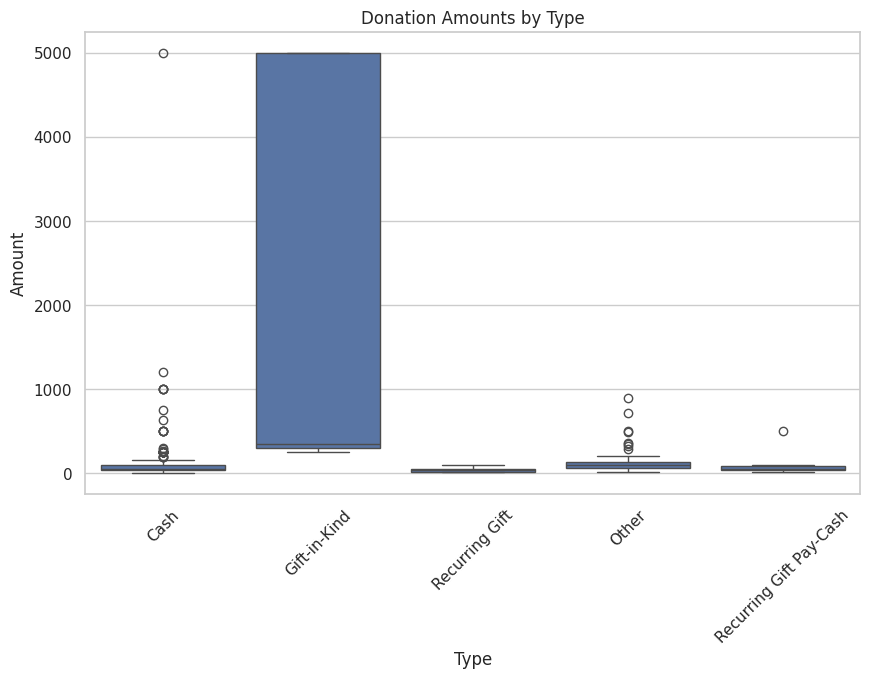

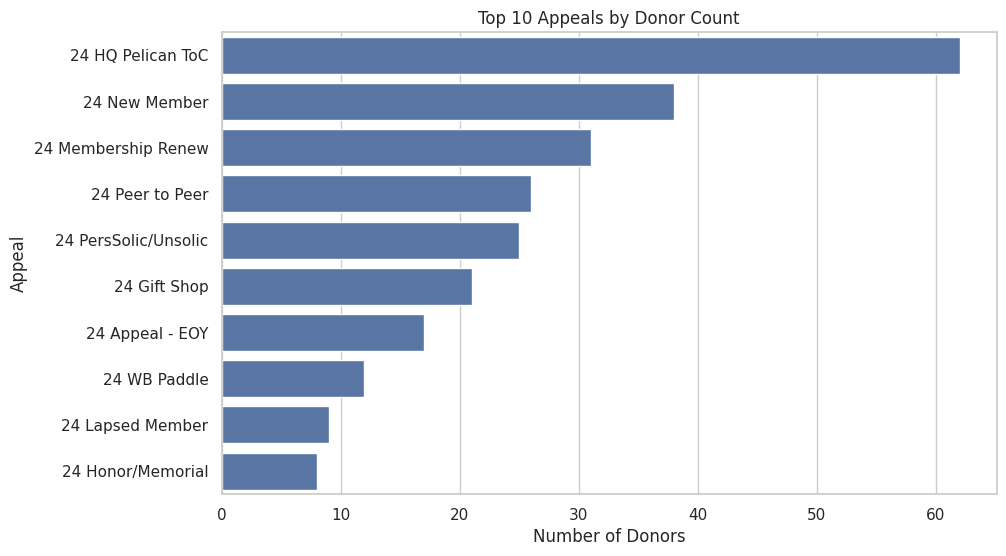

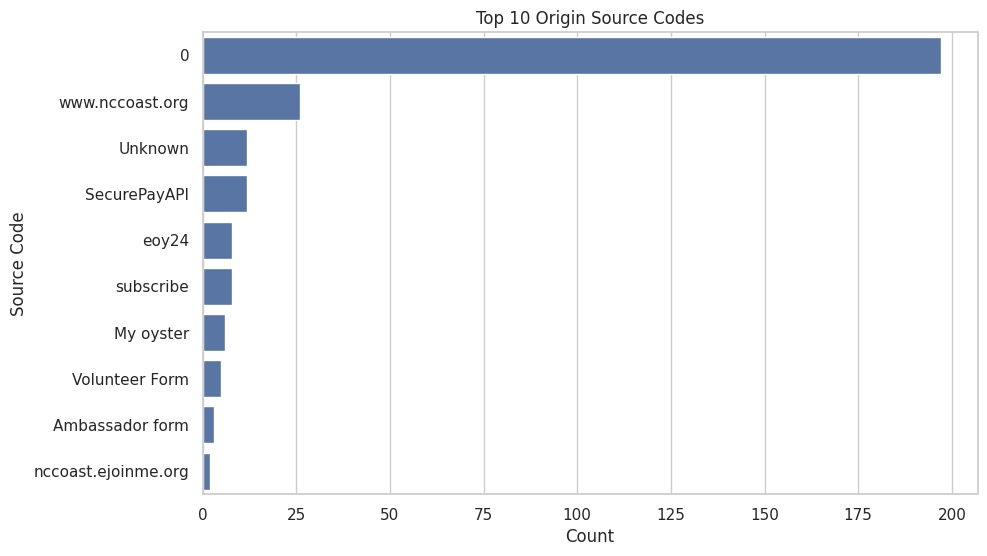

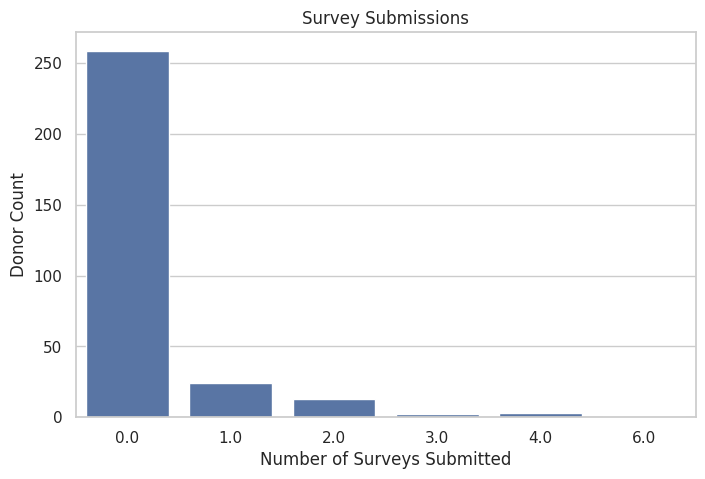

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Plot 1: Distribution of donation amounts (log scale due to outliers)
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Amount"], bins=30, kde=True)
plt.title("Donation Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Donation Amounts by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Type", y="Amount", data=df_cleaned)
plt.title("Donation Amounts by Type")
plt.xticks(rotation=45)
plt.show()

# Plot 3: Top Appeals by Donor Count
top_appeals = df_cleaned["Appeal(s)"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_appeals.values, y=top_appeals.index)
plt.title("Top 10 Appeals by Donor Count")
plt.xlabel("Number of Donors")
plt.ylabel("Appeal")
plt.show()

# Plot 4: Origin Source Code Frequency (Top 10)
top_sources = df_cleaned["Origin Source Code"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sources.values, y=top_sources.index)
plt.title("Top 10 Origin Source Codes")
plt.xlabel("Count")
plt.ylabel("Source Code")
plt.show()

# Plot 5: Survey Submitted Counts
plt.figure(figsize=(8, 5))
sns.countplot(x="Survey Submitted", data=df_cleaned)
plt.title("Survey Submissions")
plt.xlabel("Number of Surveys Submitted")
plt.ylabel("Donor Count")
plt.show()


# Donor Clustering

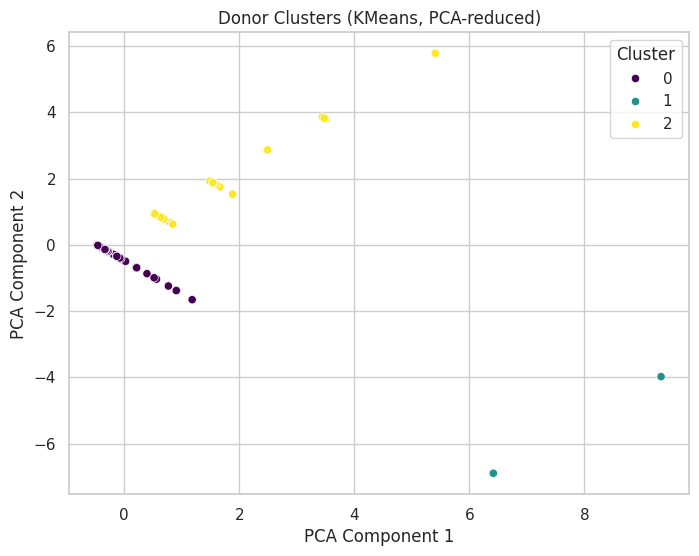

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numeric features for clustering
features_for_clustering = ['Amount', 'Survey Submitted']
X = df_cleaned[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Try KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df_cleaned['Cluster'] = clusters

# Plot the clusters using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title("Donor Clusters (KMeans, PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Analyze cluster centers
cluster_summary = df_cleaned.groupby("Cluster")[features_for_clustering].mean()

# Classification Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


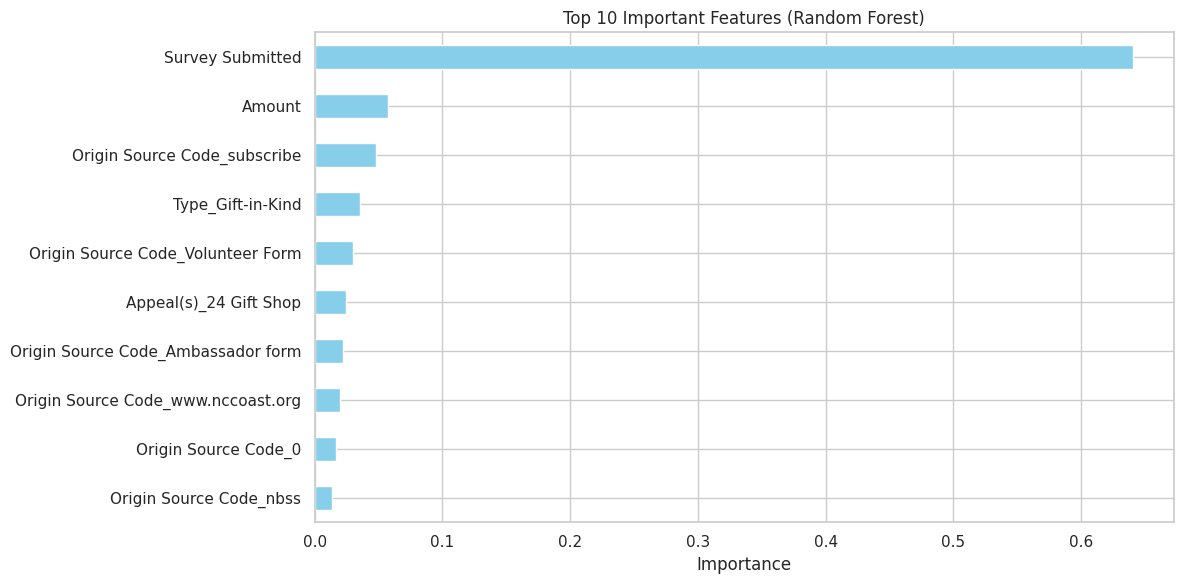

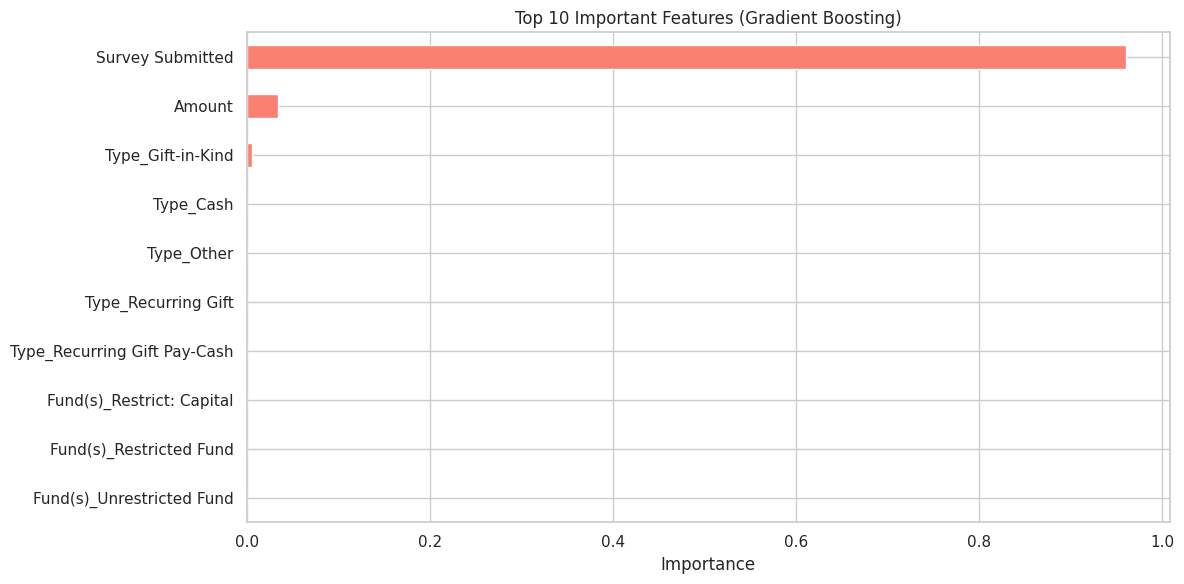

,Model,Accuracy
0,Random Forest,0.989011
1,Logistic Regression,1.000000
2,Gradient Boosting,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features: 'Type', 'Fund(s)', 'Appeal(s)', 'Origin Source Code'
categorical_cols = ['Type', 'Fund(s)', 'Appeal(s)', 'Origin Source Code']
encoded_df = pd.get_dummies(df_cleaned[categorical_cols], prefix=categorical_cols)

# Combine encoded categorical features with numerical features
enhanced_features_df = pd.concat([
    df_cleaned[['Amount', 'Survey Submitted']],
    encoded_df
], axis=1)

X = enhanced_features_df
y = df_cleaned['Cluster']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Retrain classifiers with enhanced feature set
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_importance = rf.feature_importances_

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)
gb_importance = gb.feature_importances_

# Top 10 important features from Gradient Boosting and Random Forest
top_features_rf = pd.Series(rf_importance, index=X.columns).sort_values(ascending=False).head(10)
top_features_gb = pd.Series(gb_importance, index=X.columns).sort_values(ascending=False).head(10)

# Plot feature importances
plt.figure(figsize=(12, 6))
top_features_rf.plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
top_features_gb.plot(kind='barh', color='salmon')
plt.title("Top 10 Important Features (Gradient Boosting)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Return model accuracy summary
model_accuracies_enhanced = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting'],
    'Accuracy': [rf_accuracy, lr_accuracy, gb_accuracy]
})

model_accuracies_enhanced


# Visualizing Donor Journeys

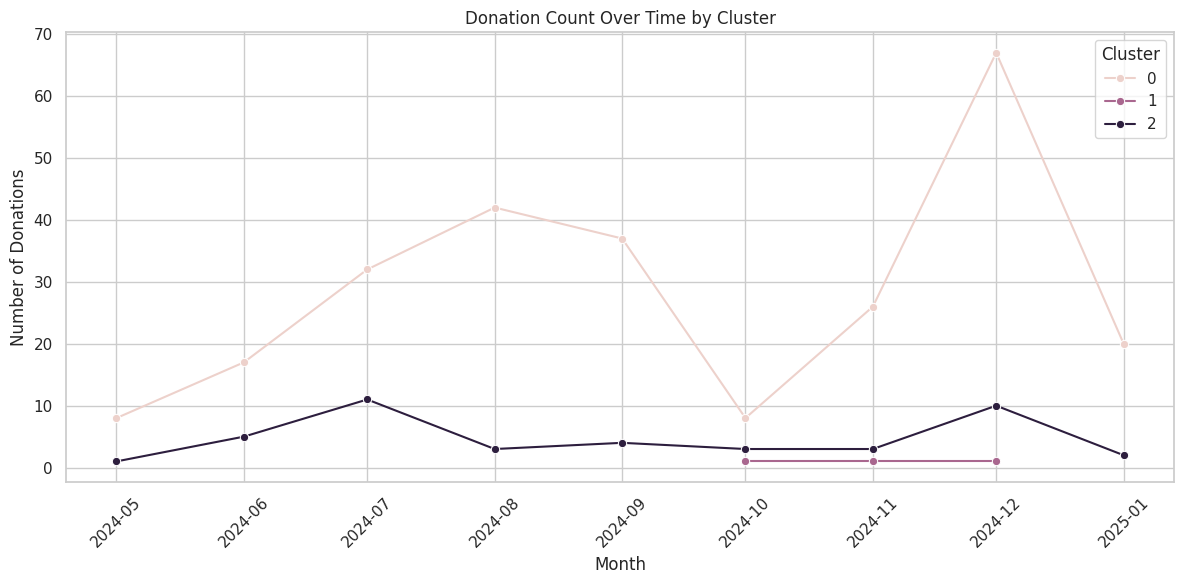

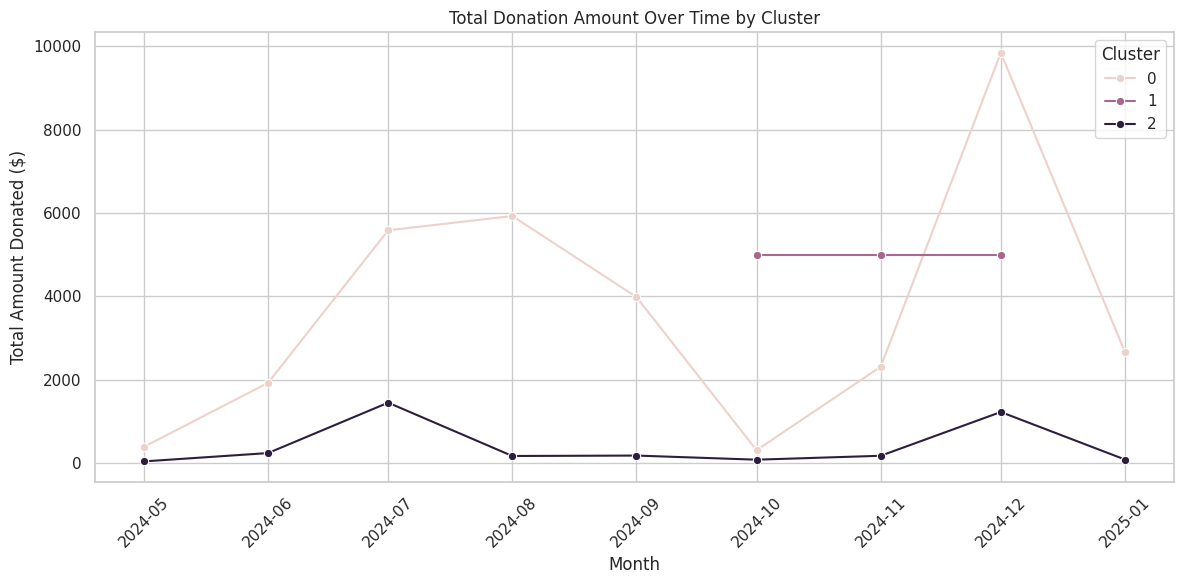

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create 'Month' column from donation Date
df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')

# Group by Month and Cluster to track donor trends
donor_trends = df_cleaned.groupby(['Month', 'Cluster']).agg(
    donation_count=('Amount', 'count'),
    total_donated=('Amount', 'sum')
).reset_index()

# Convert 'Month' from Period to datetime for plotting
donor_trends['Month'] = donor_trends['Month'].dt.to_timestamp()

# Plot donation count trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=donor_trends, x='Month', y='donation_count', hue='Cluster', marker='o')
plt.title('Donation Count Over Time by Cluster')
plt.xlabel('Month')
plt.ylabel('Number of Donations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot total donated trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=donor_trends, x='Month', y='total_donated', hue='Cluster', marker='o')
plt.title('Total Donation Amount Over Time by Cluster')
plt.xlabel('Month')
plt.ylabel('Total Amount Donated ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
